![](https://sun9-81.userapi.com/impg/cz-6k6SaNV65dJR7FCdJRi1hKSvKU18Wo-kkbA/7vzFJFugi_I.jpg?size=1621x618&quality=96&sign=5db0fbb0e3d46b2350f3f84155f84943&type=album)
# Anapa Winter Flights
______________________________________________________________________________________________________________________________
## В данной работе мне предстоит выяснить, от каких самых малоприбыльных рейсов из Анапы можно было бы отказаться в зимнее время года
______________________________________________________________________________________________________________________________

### Описание признаков
* **flight_id** — уникальный идентификационный код рейса (первичный ключ)
* **flight_no** — номер рейса, используемый в аэропорту, билете, посадачном талоне
* **arrival_airport** - аэропорт прибытия
* **city** - город, в котором находится аэропорт прибытия 
* **model** - название модели самолета
* **actual_departure** - реальное время вылета 
* **actual_arrival** - реальное время прибытия
* **flight_time** - время полета
* **fuel_usage** - расход топлива кг/час в зависимости от модели самолета 
* **aircraft_code** - уникальный идентификационный номер модели самолета (трехзначный код)  
* **seat_economy** - количество мест класса "эконом" в самолете 
* **seat_business** - количество мест класса "бизнес" в самолете
* **seat_total** - общее количество мест на борту самолета
* **purchased_economy** - приобритенные места класса "эконом" на рейсе
* **purchased_business** - приобритенные места класса "эконом" на рейсе
* **total_purchased** - общее кол-во приобретенных мест обоих классов в самолете
* **amount_economy** - стоимость билета класса "эконом"
* **amount_business** - стоимость билета класса "бизнес"
* **total_amount** - общая стоимость приобретенных билетов на рейсе

# import

In [1]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

# FUNCTIONS

In [73]:
# Вспомогательные функции, которые помогут в дальнейшей работе
# Функция для отображения текстовых меток на графиках
def points(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

# DATA

In [2]:
df = pd.read_csv('Anapa_winter_flights.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   flight_id           127 non-null    int64  
 1   flight_no           127 non-null    object 
 2   arrival_airport     127 non-null    object 
 3   city                127 non-null    object 
 4   model               127 non-null    object 
 5   actual_departure    127 non-null    object 
 6   actual_arrival      127 non-null    object 
 7   flight_time         127 non-null    float64
 8   fuel_usage          127 non-null    int64  
 9   aircraft_code       127 non-null    object 
 10  seat_economy        127 non-null    int64  
 11  seat_business       127 non-null    int64  
 12  seat_total          127 non-null    int64  
 13  purchased_economy   118 non-null    float64
 14  purchased_business  118 non-null    float64
 15  total_purchased     118 non-null    float64
 16  amount_e

In [4]:
df.head(5)

,flight_id,flight_no,arrival_airport,city,model,actual_departure,actual_arrival,flight_time,fuel_usage,aircraft_code,seat_economy,seat_business,seat_total,purchased_economy,purchased_business,total_purchased,amount_economy,amount_business,total_amount
0,136119,PG0252,SVO,Moscow,Boeing 737-300,2017-01-03T10:08:00Z,2017-01-03T11:49:00Z,101.0,2400,733,118,12,130,102.0,11.0,113.0,1250400.0,402600.0,1653000.0
1,136120,PG0252,SVO,Moscow,Boeing 737-300,2017-02-24T10:07:00Z,2017-02-24T11:46:00Z,99.0,2400,733,118,12,130,98.0,11.0,109.0,1202800.0,402600.0,1605400.0
2,136122,PG0252,SVO,Moscow,Boeing 737-300,2017-01-08T10:08:00Z,2017-01-08T11:48:00Z,100.0,2400,733,118,12,130,87.0,10.0,97.0,1065000.0,366000.0,1431000.0
3,136130,PG0252,SVO,Moscow,Boeing 737-300,2017-02-13T10:07:00Z,2017-02-13T11:46:00Z,99.0,2400,733,118,12,130,97.0,10.0,107.0,1190600.0,366000.0,1556600.0
4,136131,PG0252,SVO,Moscow,Boeing 737-300,2017-01-28T10:07:00Z,2017-01-28T11:46:00Z,99.0,2400,733,118,12,130,112.0,12.0,124.0,1373600.0,439200.0,1812800.0


![](https://sun9-30.userapi.com/impg/SaD8_MCvAMVUbkAm5lSLCCg7llximmKQ0COEoA/X0r_UyfHpRA.jpg?size=1488x565&quality=96&sign=94d5b0be00b287b34034342868c8bc9a&type=album)

# EDA

Посмотрим на количество пропусков в колонках, а вдруг?

In [5]:
for col in df.columns:
    percnt_missing = np.mean(df[col].isnull())
    print(f'{col} - {round(percnt_missing*100)}%')

flight_id - 0%
flight_no - 0%
arrival_airport - 0%
city - 0%
model - 0%
actual_departure - 0%
actual_arrival - 0%
flight_time - 0%
fuel_usage - 0%
aircraft_code - 0%
seat_economy - 0%
seat_business - 0%
seat_total - 0%
purchased_economy - 7%
purchased_business - 7%
total_purchased - 7%
amount_economy - 7%
amount_business - 7%
total_amount - 7%


Имеются пропущенные значения, и появляются они на этапе количества и стоимости приобретенных билетов. Посмотрим на них позже.

***Промежуточные выводы:***

* Датасет содержит 127 строк и 19 колонок 
* Пропуски имеются в небольшом количестве
* 5 колонок в формате int64 - это ***flight_id, fuel_usage, seat_economy,seat_business, seat_total***
* 7 колонок в формате float64 - это ***flight_time, purchased_economy, purchased_business, total_purchased, amount_economy, amount_business, total_amount***, остальные 7 в формате *object*
* Имеются колонки  ***actual_departure, actual_arrival*** которые содержат данные о датах и времени, но не являются форматом datetime

### FLIGHT_ID

In [6]:
print(f'Уникальное количество данных в колонке : {df.flight_id.nunique()}')

Уникальное количество данных в колонке : 127


*В данной колонке все значения уникальные*

### FLIGHT_NO

In [7]:
print(f'Уникальное количество данных в колонке : {df.flight_no.nunique()}')
df['flight_no'].value_counts()

Уникальное количество данных в колонке : 3


PG0480    59
PG0252    59
PG0194     9
Name: flight_no, dtype: int64

### ARRIVAL_AIRPORT

In [8]:
print(f'Код аэропорта прибытия ИАТА : {df.arrival_airport.unique()}')

Код аэропорта прибытия ИАТА : ['SVO' 'EGO' 'NOZ']


**Аэропорты прибытия:**
   - Код аэропорта прибытия ИАТА **SVO** - это город Москва  
   - Код аэропорта прибытия ИАТА **EGO** - это город Белгород
   - Код аэропорта прибытия ИАТА **NOZ** - это город Новокузнецк

### CITY

In [9]:
print(f'Уникальные названия городов прибытия: {df.city.unique()}')

Уникальные названия городов прибытия: ['Moscow' 'Belgorod' 'Novokuznetsk']


*У нас три точки назначения зимой из Анапы: Москва, Белгород и Новокузнецк*

### MODEL

In [10]:
print(f'Уникальные названия моделей самолетов: {df.model.unique()}')

Уникальные названия моделей самолетов: ['Boeing 737-300' 'Sukhoi Superjet-100']


На всех направлениях данного датасета используются две модели самолётов: ***Boeing 737-300 и Sukhoi Superjet-100***  
Посмотрим в какие города летает каждый из них:

In [11]:
df[df.city == 'Moscow'].model.unique()

array(['Boeing 737-300'], dtype=object)

In [12]:
df[df.city == 'Belgorod'].model.unique()

array(['Sukhoi Superjet-100'], dtype=object)

In [13]:
df[df.city == 'Novokuznetsk'].model.unique()

array(['Boeing 737-300'], dtype=object)

Итак, в Москву и Новокузнецк из Анапы летают только Boeing 737-300, а в Белгород Sukhoi Superjet-100.
С чем это может быть связано? Проверим позже.

### FLIGHT_TIME

In [15]:
print(f'Уникальные значения в колонке: {df.flight_time.unique()}')

Уникальные значения в колонке: [101.  99. 100.  98. 103. 102.  50.  51.  49. 312. 310. 299. 305. 304.
 307. 302. 311.]


Переведем время полета в часы:

In [16]:
df.flight_time = df.flight_time / 60

In [17]:
df.flight_time.head()

0    1.683333
1    1.650000
2    1.666667
3    1.650000
4    1.650000
Name: flight_time, dtype: float64

### ACTUAL_DEPARTURE

In [18]:
print(f'Уникальное количество данных в колонке : {df.actual_departure.nunique()}')

Уникальное количество данных в колонке : 127


In [19]:
df.actual_departure.head()

0    2017-01-03T10:08:00Z
1    2017-02-24T10:07:00Z
2    2017-01-08T10:08:00Z
3    2017-02-13T10:07:00Z
4    2017-01-28T10:07:00Z
Name: actual_departure, dtype: object

Как мы заметили в начале исследования, формат у этих данных не соответствует datetime по типу, однако по содержанию является им.
Переведем его во временной формат:

In [20]:
df.actual_departure = pd.to_datetime(df.actual_departure)

In [21]:
df.actual_departure.head()

0   2017-01-03 10:08:00+00:00
1   2017-02-24 10:07:00+00:00
2   2017-01-08 10:08:00+00:00
3   2017-02-13 10:07:00+00:00
4   2017-01-28 10:07:00+00:00
Name: actual_departure, dtype: datetime64[ns, UTC]

### ACTUAL_ARRIVAL

In [22]:
print(f'Уникальное количество данных в колонке : {df.actual_arrival.nunique()}')

Уникальное количество данных в колонке : 127


In [23]:
df.actual_arrival = pd.to_datetime(df.actual_arrival)

In [24]:
df.actual_arrival.head()

0   2017-01-03 11:49:00+00:00
1   2017-02-24 11:46:00+00:00
2   2017-01-08 11:48:00+00:00
3   2017-02-13 11:46:00+00:00
4   2017-01-28 11:46:00+00:00
Name: actual_arrival, dtype: datetime64[ns, UTC]

### FUEL_USAGE

In [25]:
df.groupby(['aircraft_code'])[
    'fuel_usage'].unique().sort_values(ascending=False)

aircraft_code
733    [2400]
SU9    [1700]
Name: fuel_usage, dtype: object

*В этой колонке представлены данные о топливных расходах. У каждой модели самолета есть свой уровень расхода топлива (км/час).
Эти данные были взяты из свободногшо доступа в инернете.  
Используемый ресурс : [ссылка](http://newsruss.ru/doc/index.php/%D0%A0%D0%B0%D1%81%D1%85%D0%BE%D0%B4_%D1%82%D0%BE%D0%BF%D0%BB%D0%B8%D0%B2%D0%B0_%D1%81%D0%B0%D0%BC%D0%BE%D0%BB%D0%B5%D1%82%D0%B0)*

### AIRCRAFT_CODE

In [27]:
df['aircraft_code'].value_counts()

733    68
SU9    59
Name: aircraft_code, dtype: int64

**Авиапарк летающий из Анапы составляют:**
   - 733 - Boeing 777-300
   - SU9 - Sukhoi Superjet-100

### SEAT_ECONOMY

In [28]:
df.groupby(['aircraft_code'])[
    'seat_economy'].unique().sort_values(ascending=False)

aircraft_code
733    [118]
SU9     [85]
Name: seat_economy, dtype: object

В Боинг гораздо больше мест эконом-класса, чем в Суперджете.

### SEAT_BUSINESS

In [29]:
df.groupby(['aircraft_code'])[
    'seat_business'].unique().sort_values(ascending=False)

aircraft_code
SU9    [12]
733    [12]
Name: seat_business, dtype: object

*Количество мест класса "бизнес" на обоих бортах одинаковое -12 шт*

### SEAT_TOTAL

In [30]:
df.groupby(['aircraft_code'])[
    'seat_total'].unique().sort_values(ascending=False)

aircraft_code
733    [130]
SU9     [97]
Name: seat_total, dtype: object

Общее количество мест в самолетах иллюстрирует, что вместимость Боинга выше, чем Суперджета.
Может быть поэтому из Анапы в Москву летают именно 733-е, потому что направление популярное, столица все-таки? А как насчет Новокузнецка? Интересно!

***Исходя из тех данных, которые были представлены в Metabase: dst_project/Aircrafts/range(колонка), максимальная дальность полета:***  
- Sukhoi Superjet-100 - 3 000 км
- Boeing 737-300 - 4 200 км  

А расстояние от Анапы до Новокузнецка по прямой составляет: 3 658 км.  
Данные про расстояние взяты отсюда: [ссылка](http://101karta.ru/aviaperelet/anapa/novokuznetsk)

***Из вышеизложенного следует, что с точки зрения дальности полета и для осуществления прямого перелета, действительно подходит именно Boeing 737-300.***        

### PURCHASED_ECONOMY 


In [31]:
df.groupby(['aircraft_code'])[
    'purchased_economy'].sum().sort_values(ascending=False)

aircraft_code
733    6054.0
SU9    4668.0
Name: purchased_economy, dtype: float64

### PURCHASED_BUSINESS

In [32]:
df.groupby(['aircraft_code'])[
    'purchased_business'].sum().sort_values(ascending=False)

aircraft_code
SU9    653.0
733    620.0
Name: purchased_business, dtype: float64

### TOTAL_PURCHASED

In [33]:
df.groupby(['aircraft_code'])[
    'total_purchased'].sum().sort_values(ascending=False)

aircraft_code
733    6674.0
SU9    5321.0
Name: total_purchased, dtype: float64

### AMOUNT_ECONOMY

In [34]:
df.groupby(['aircraft_code'])[
    'amount_economy'].sum().sort_values(ascending=False)

aircraft_code
733    74220000.0
SU9    29574000.0
Name: amount_economy, dtype: float64

Здесь отражены суммарные стоимости по купленным авиабилетам класса "эконом" на обоих бортах за все три месяца.  
Как видно, у модели Boeing 777-300 эта сумма больше примерно в 2.5 раза.

### AMOUNT_BUSINESS

In [35]:
df.groupby(['aircraft_code'])[
    'amount_business'].sum().sort_values(ascending=False)

aircraft_code
733    22692000.0
SU9    12341700.0
Name: amount_business, dtype: float64

Здесь отражены суммарные стоимости по купленным авиабилетам класса "бизнес" на обоих бортах за все три месяца.  
И вновь "лидирует" Boeing 777-300, почти в два раза больше проданных билетов бизнесс класса. Хотя, из показателей выше, можно было заметить, что по количеству проданных билетов бизнес класса SU9 обогнал 733-й. Видимо, это говорит о том, что сама стоимость билета в бизнесс классе у этих моделей разная.
Интересно будет посмотреть на заполненность данного класса на рейсах.

### TOTAL_AMOUNT 

In [36]:
df.total_amount.sum()

138827700.0

Общая стоимость всех проданных билетов составляет: 138 827 700 руб   
Далее поглядим что от этой суммы "остается", и тем самым делает рейс выгодным для перевозчика.

### || ПРОПУСКИ ||

![](https://sun9-33.userapi.com/impg/MFblc69M55vlnGgbd5G8mY_dAWQ4bs2xFcUDGQ/HAM16ZTviZ8.jpg?size=2560x632&quality=96&sign=fc6038f6af184f9bc1ae5ee0d820c1f6&type=album)

Прежде чем делать дальнейшие расчеты, необходимо избавиться от пропусков:

In [37]:
df[df.total_purchased.isna() == True]

,flight_id,flight_no,arrival_airport,city,model,actual_departure,actual_arrival,flight_time,fuel_usage,aircraft_code,seat_economy,seat_business,seat_total,purchased_economy,purchased_business,total_purchased,amount_economy,amount_business,total_amount
118,136523,PG0194,NOZ,Novokuznetsk,Boeing 737-300,2017-01-10 06:14:00+00:00,2017-01-10 11:26:00+00:00,5.200000,2400,733,118,12,130,NaN,NaN,NaN,NaN,NaN,NaN
119,136513,PG0194,NOZ,Novokuznetsk,Boeing 737-300,2017-02-28 06:13:00+00:00,2017-02-28 11:23:00+00:00,5.166667,2400,733,118,12,130,NaN,NaN,NaN,NaN,NaN,NaN
120,136514,PG0194,NOZ,Novokuznetsk,Boeing 737-300,2017-02-07 06:14:00+00:00,2017-02-07 11:13:00+00:00,4.983333,2400,733,118,12,130,NaN,NaN,NaN,NaN,NaN,NaN
121,136560,PG0194,NOZ,Novokuznetsk,Boeing 737-300,2017-01-24 06:13:00+00:00,2017-01-24 11:18:00+00:00,5.083333,2400,733,118,12,130,NaN,NaN,NaN,NaN,NaN,NaN
122,136544,PG0194,NOZ,Novokuznetsk,Boeing 737-300,2017-01-31 06:10:00+00:00,2017-01-31 11:14:00+00:00,5.066667,2400,733,118,12,130,NaN,NaN,NaN,NaN,NaN,NaN
123,136511,PG0194,NOZ,Novokuznetsk,Boeing 737-300,2017-02-21 06:15:00+00:00,2017-02-21 11:25:00+00:00,5.166667,2400,733,118,12,130,NaN,NaN,NaN,NaN,NaN,NaN
124,136540,PG0194,NOZ,Novokuznetsk,Boeing 737-300,2017-01-17 06:14:00+00:00,2017-01-17 11:21:00+00:00,5.116667,2400,733,118,12,130,NaN,NaN,NaN,NaN,NaN,NaN
125,136546,PG0194,NOZ,Novokuznetsk,Boeing 737-300,2017-01-03 06:13:00+00:00,2017-01-03 11:15:00+00:00,5.033333,2400,733,118,12,130,NaN,NaN,NaN,NaN,NaN,NaN
126,136567,PG0194,NOZ,Novokuznetsk,Boeing 737-300,2017-02-14 06:12:00+00:00,2017-02-14 11:23:00+00:00,5.183333,2400,733,118,12,130,NaN,NaN,NaN,NaN,NaN,NaN


Все рейсы ***Анапа - Новокузнецк*** имеют пустые значения по части купленных билетов (любых классов) и стоимости билетов.
К сожалению, мы не сможем проанализировать эти данные. При попытке "парсить" какие-дибо данные о расценках 2017 года, я потерпела неудачу.   
Следовательно, принимаю решение удалить эти данные из датасета, для корректного последующего анализа. 

In [38]:
df.dropna(inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   flight_id           118 non-null    int64              
 1   flight_no           118 non-null    object             
 2   arrival_airport     118 non-null    object             
 3   city                118 non-null    object             
 4   model               118 non-null    object             
 5   actual_departure    118 non-null    datetime64[ns, UTC]
 6   actual_arrival      118 non-null    datetime64[ns, UTC]
 7   flight_time         118 non-null    float64            
 8   fuel_usage          118 non-null    int64              
 9   aircraft_code       118 non-null    object             
 10  seat_economy        118 non-null    int64              
 11  seat_business       118 non-null    int64              
 12  seat_total          118 non-null    

*Пропуски удалены, смотрим дальше на данные*

![](https://s28478.pcdn.co/wp-content/uploads/2019/03/baggage_claim-1440x500.jpg)


###  || ПРИБЫЛЬ ||

### Чтобы попробовать посчитать прибыль от рейса, необходимо знать количество затраченного топлива в полете и его стоимости.
Для этого, создам два признака:  
- Расход топлива (в зависимости от времени полета) **fuel_spent**  
- Затраты на топливо **fuel_price**

In [40]:
df['fuel_spent'] = df.flight_time * df.fuel_usage
df['fuel_price'] = df.fuel_spent * 42.7

Данные по цене топлива за кг, без учета НДС были взяты с сайта Росавиации:[ссылка](https://favt.gov.ru/stat-date-gsm-price/?id=7329)  
А именно:
- Январь 2017 - 41,435  
- Февраль 2017 - 39,553  
- Декабрь 2017 - 47,101  
Возьмем среднеарифметическое значение: 42,7

**И наконец, рассчитаем прибыль (profit) как разность общей стоимости всех проданных билетов и топливные расходы:**

In [41]:
df['profit'] = df.total_amount - df.fuel_price
df.profit = df.profit.astype('int64')

Проверим, есть ли среди наших рейсов откровенно убыточные:

In [42]:
len(df[df['profit'] < 0])

0

А, собственно их и нет! *Конечно, все это расчитано без учета НДС в ценах за топливо, стоимости заправки и хранения топлива и.т.п*

### Посмотрим на прибыль только от продажи билетов:

In [45]:
statistic = df.groupby('flight_no').total_amount.agg(
    ['min', 'mean', 'max']).astype('int64').reset_index()
statistic

,flight_no,min,mean,max
0,PG0252,1398000,1642576,1886000
1,PG0480,531000,710435,765300


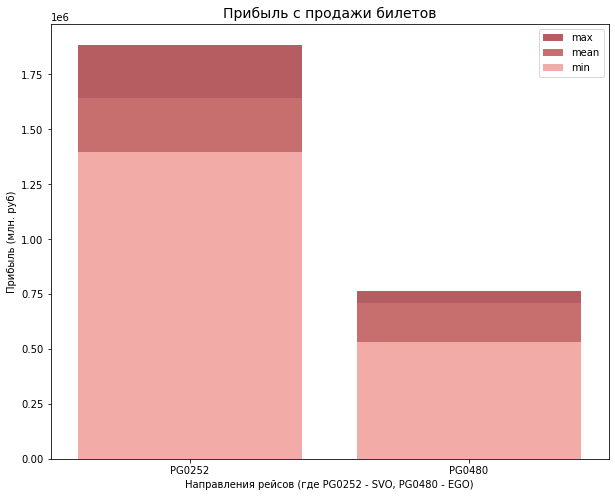

In [50]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.set_color_codes('deep')
sns.barplot(x='flight_no', y='max', data=statistic, color='r', label='max')
sns.set_color_codes('muted')
sns.barplot(x='flight_no', y='mean', data=statistic, color='r', label='mean')
sns.set_color_codes('pastel')
sns.barplot(x='flight_no', y='min', data=statistic, color='r', label='min')
ax.legend(loc=1)
plt.ylabel(None)
ax.set_title('Прибыль с продажи билетов', fontsize=14)
ax.set_xlabel('Направления рейсов (где PG0252 - SVO, PG0480 - EGO)')
ax.set_ylabel('Прибыль (млн. руб)')
# fig.savefig('Прибыль с продажи билетов.svg')

Очень наглядно можно заметить насколько дороже рейсы в Москву на Боингах.  
Теперь посмотрим на количественную составляющую, насколько их заполняемость разнится:

In [51]:
seats_statistic = df.groupby('flight_no').total_purchased.agg(
    ['min', 'mean', 'max']).astype('int64').reset_index()
seats_statistic

,flight_no,min,mean,max
0,PG0252,97,113,130
1,PG0480,64,90,97


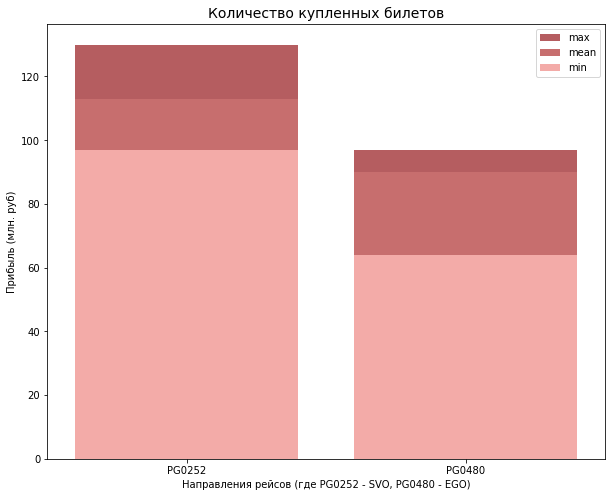

In [55]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.set_color_codes('deep')
sns.barplot(x='flight_no', y='max',
            data=seats_statistic, color='r', label='max')
sns.set_color_codes('muted')
sns.barplot(x='flight_no', y='mean',
            data=seats_statistic, color='r', label='mean')
sns.set_color_codes('pastel')
sns.barplot(x='flight_no', y='min',
            data=seats_statistic, color='r', label='min')
ax.legend(loc=1)
plt.ylabel(None)
ax.set_title('Количество купленных билетов', fontsize=14)
ax.set_xlabel('Направления рейсов (где PG0252 - SVO, PG0480 - EGO)')
ax.set_ylabel('Прибыль (млн. руб)')
# fig.savefig('Кол-во купленныхи билетов.svg')

### Адаптируем заполненность самолета на рейсе в процентный эквивалент:

In [174]:
df['seats_percent'] = df.total_purchased / df.seat_total

Определим планку рентабельности на 80% и посмотрим какие рейсы из нее выпадут:

In [63]:
df[df.seats_percent < 0.80]

,flight_id,flight_no,arrival_airport,city,model,actual_departure,actual_arrival,flight_time,fuel_usage,aircraft_code,seat_economy,seat_business,seat_total,purchased_economy,purchased_business,total_purchased,amount_economy,amount_business,total_amount,fuel_spent,fuel_price,profit,seats_percent
2,136122,PG0252,SVO,Moscow,Boeing 737-300,2017-01-08 10:08:00+00:00,2017-01-08 11:48:00+00:00,1.666667,2400,733,118,12,130,87.0,10.0,97.0,1065000.0,366000.0,1431000.0,4000.000000,170800.000000,1260200,0.746154
12,136178,PG0252,SVO,Moscow,Boeing 737-300,2017-01-29 10:10:00+00:00,2017-01-29 11:49:00+00:00,1.650000,2400,733,118,12,130,90.0,9.0,99.0,1105200.0,329400.0,1434600.0,3960.000000,169092.000000,1265508,0.761538
15,136202,PG0252,SVO,Moscow,Boeing 737-300,2017-01-05 10:07:00+00:00,2017-01-05 11:49:00+00:00,1.700000,2400,733,118,12,130,89.0,11.0,100.0,1093000.0,402600.0,1495600.0,4080.000000,174216.000000,1321384,0.769231
21,136250,PG0252,SVO,Moscow,Boeing 737-300,2017-02-08 10:06:00+00:00,2017-02-08 11:47:00+00:00,1.683333,2400,733,118,12,130,91.0,8.0,99.0,1115000.0,292800.0,1407800.0,4040.000000,172508.000000,1235292,0.761538
38,136360,PG0252,SVO,Moscow,Boeing 737-300,2017-02-05 10:08:00+00:00,2017-02-05 11:48:00+00:00,1.666667,2400,733,118,12,130,86.0,11.0,97.0,1052800.0,402600.0,1455400.0,4000.000000,170800.000000,1284600,0.746154
39,136366,PG0252,SVO,Moscow,Boeing 737-300,2017-01-11 10:08:00+00:00,2017-01-11 11:47:00+00:00,1.650000,2400,733,118,12,130,92.0,11.0,103.0,1124800.0,402600.0,1527400.0,3960.000000,169092.000000,1358308,0.792308
54,136464,PG0252,SVO,Moscow,Boeing 737-300,2017-01-09 10:07:00+00:00,2017-01-09 11:47:00+00:00,1.666667,2400,733,118,12,130,93.0,7.0,100.0,1141800.0,256200.0,1398000.0,4000.000000,170800.000000,1227200,0.769231
68,136642,PG0480,EGO,Belgorod,Sukhoi Superjet-100,2017-01-30 09:28:00+00:00,2017-01-30 10:17:00+00:00,0.816667,1700,SU9,85,12,97,54.0,10.0,64.0,342000.0,189000.0,531000.0,1388.333333,59281.833333,471718,0.659794
93,136807,PG0480,EGO,Belgorod,Sukhoi Superjet-100,2017-02-23 09:28:00+00:00,2017-02-23 10:18:00+00:00,0.833333,1700,SU9,85,12,97,60.0,8.0,68.0,379800.0,151200.0,531000.0,1416.666667,60491.666667,470508,0.701031
111,136922,PG0480,EGO,Belgorod,Sukhoi Superjet-100,2017-02-11 09:27:00+00:00,2017-02-11 10:17:00+00:00,0.833333,1700,SU9,85,12,97,66.0,10.0,76.0,418800.0,189000.0,607800.0,1416.666667,60491.666667,547308,0.783505


### Построим графики, наглядно иллюстрирующие распределение данных признаков для каждого направления:

In [81]:
unprofit_svo = df[(df.flight_no == 'PG0252') & (
    df.seats_percent <= 0.80)].profit.max()
unprofit_ego = df[(df.flight_no == 'PG0480') & (
    df.seats_percent <= 0.80)].profit.max()

***Для SVO, Москва:***

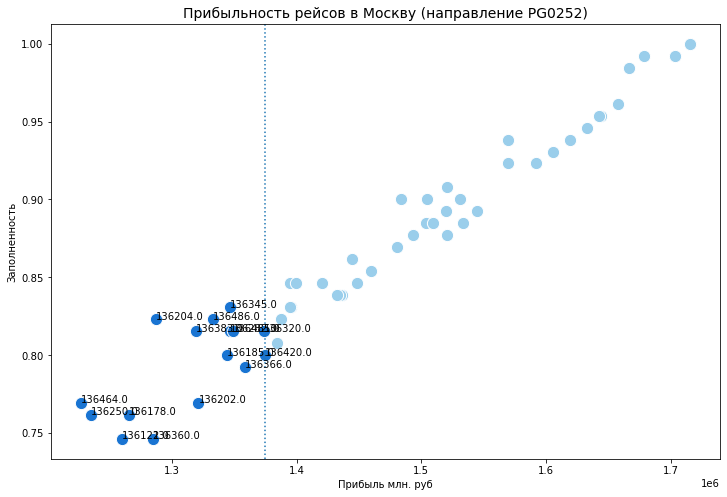

In [116]:
data1 = df[df.profit <= unprofit_svo]
data2 = df[df.profit > unprofit_svo]

fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x='profit', y='seats_percent',
                data=data2[data2.flight_no == 'PG0252'], s=150, color='#9ACEEB')
sns.scatterplot(x='profit', y='seats_percent',
                data=data1[data1.flight_no == 'PG0252'], s=150, color='#1974d2')
ax.axvline(unprofit_svo, linestyle=':')
ax.set_title('Прибыльность рейсов в Москву (направление PG0252)', fontsize=14)
ax.set_xlabel('Прибыль млн. руб')
ax.set_ylabel('Заполненность')

points(data1[data1.flight_no == 'PG0252'].profit,
       data1[data1.flight_no == 'PG0252'].seats_percent,
       data1[data1.flight_no == 'PG0252'].flight_id,
       plt.gca())

***Для EGO, Белгород:***

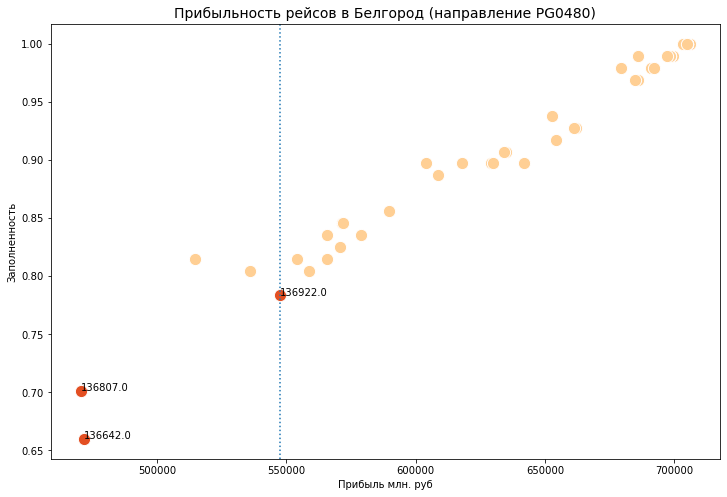

In [102]:
data3 = df[df.seats_percent > 0.80]
data4 = df[df.seats_percent <= 0.80]

fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x='profit', y='seats_percent',
                data=data3[data3.flight_no == 'PG0480'], s=150, color='#ffcf94')
sns.scatterplot(x='profit', y='seats_percent',
                data=data4[data4.flight_no == 'PG0480'], s=150, color='#e34f22')
ax.axvline(unprofit_ego, linestyle=':')
ax.set_title('Прибыльность рейсов в Белгород (направление PG0480)', fontsize=14)
ax.set_xlabel('Прибыль млн. руб')
ax.set_ylabel('Заполненность')

points(data4[data4.flight_no == 'PG0480'].profit,
       data4[data4.flight_no == 'PG0480'].seats_percent,
       data4[data4.flight_no == 'PG0480'].flight_id,
       plt.gca())

И несмотря на то, что в целом рейсы в Москву летают с более вместимым самолетом,  и кол-во проданных авиабилетов на эти рейсы тоже вразы больше, Белгородские рейсы имеют меньше рейсов с низкой прибылью.

### А теперь посомтрим как эта прибыль зависит от заполненности самолетов:

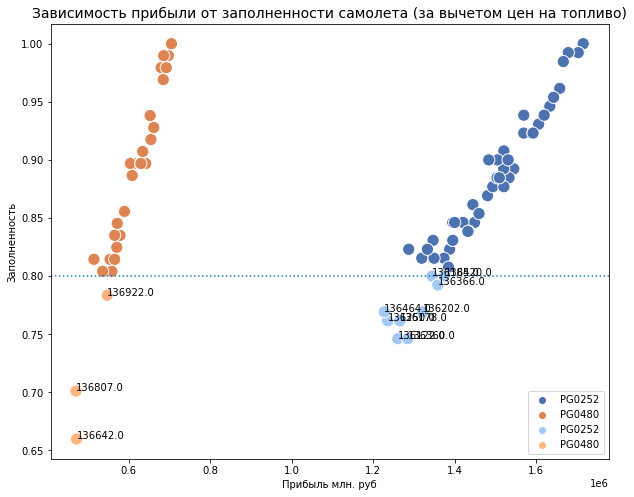

In [114]:
df_1 = df[df.seats_percent > 0.80]
df_2 = df[df.seats_percent <= 0.80]

fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='profit', y='seats_percent', data=df_1,
                hue='flight_no', s=150, palette="deep")
sns.scatterplot(x='profit', y='seats_percent', data=df_2,
                hue='flight_no', s=150, palette="pastel")
sns.set_color_codes('pastel')
plt.axhline(0.80, linestyle=':')
ax.legend(loc=4)
ax.set_title(
    'Зависимость прибыли от заполненности самолета (за вычетом цен на топливо)', fontsize=14)
ax.set_xlabel('Прибыль млн. руб')
ax.set_ylabel('Заполненность')

label_point(df_2.profit,
            df_2.seats_percent,
            df_2.flight_id,
            plt.gca())

Все-таки есть влияние заполненности на прибыль

### Посмотрим отдельно, как "классовость" влияет на прибыль:

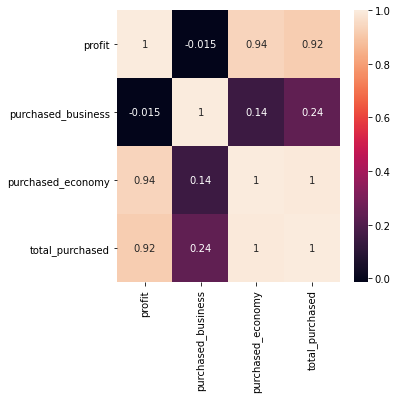

In [155]:
part = df.loc[:, ['profit', 'purchased_business',
                  'purchased_economy', 'total_purchased']]
sns.heatmap(part.corr(), annot=True)
plt.gcf().set_size_inches(5, 5)

Как видно, конкретно "классовость" как раз не влияет, то есть кол-во проданных билетов на "бизнес класс" не влияет на прибыль, а вот общее кол-во проданных билетов, конечно же влияет напрямую, как и кол-во проданных билетов "эконом класса". Наверное, это происходит из-за того, что процентное соотношение бизнес класса и эконом в самолете конечно же в сторону эконом класса. И тем более, как мы видели выше, кол-во мест бизнес класса у обоих самолетов по 12, а вот вместимость эконом класса у Боинга разительно выше.

### Посмотрим на корреляцию сразу нескольких факторов: длительность полета, общее количество проданных билетов на рейс, стоимость топлива и его расход в зависимости от модели самолета:

In [170]:
cor = ['profit', 'flight_time', 'total_purchased', 'fuel_spent', 'fuel_usage']
df[cor].corr()

,profit,flight_time,total_purchased,fuel_spent,fuel_usage
profit,1.000000,0.967301,0.917689,0.967901,0.969649
flight_time,0.967301,1.000000,0.802897,0.999946,0.999446
total_purchased,0.917689,0.802897,1.000000,0.803285,0.805490
fuel_spent,0.967901,0.999946,0.803285,1.000000,0.999719
fuel_usage,0.969649,0.999446,0.805490,0.999719,1.000000


Text(0.5, 1.0, 'Корреляционная карта')

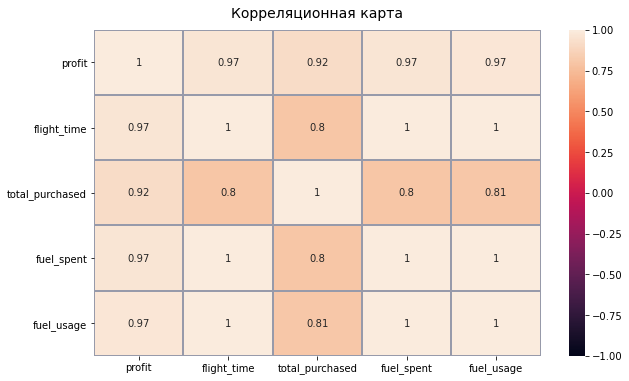

In [173]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df[cor].corr(), vmin=-1, vmax=1,
                      annot=True, linewidths=1, linecolor='#979aaa')
heatmap.set_title('Корреляционная карта', fontdict={'fontsize': 14}, pad=12)

Отсюда видно, что прибыль зависит и от времени полета, и от стоимости топлива и его расхода достаточно сильно, и чуть слабее от общего количества проданных билетов

### Выводы:
* На прибыль очень влияет количество проданных мест
* Также влияет расход топлива
* Нет данных для Новокузнецка (На основе этих данных можно было бы углубиться в анализ расстояние-прибыль)
* Недостаточно данных для расчёта реальных затрат. Не учтены разные факторы, такие как: таксы и сборы аэропортов, зарплата экипажа и сотрудников аэропорта, амортизация самолёта, и аэропортов, расходы на питание пасажиров и т.д.

## ДОПОЛНИТЕЛЬНОЕ ЗАДАНИЕ

→ Шаг 1. Укажите номера рейсов, которые вы предлагаете убрать. Укажите предполагаемую прибыльность этих рейсов и среднюю прибыльность всех рейсов.

→ Шаг 2. Опишите, как вы проводили аналитику, какие данные были использованы для оценки доходности рейса и расходов на них.

### → Шаг 1. Укажите номера рейсов, которые вы предлагаете убрать. Укажите предполагаемую прибыльность этих рейсов и среднюю прибыльность всех рейсов.  

***Посмотрим еще раз на предполагаемые "не очень" прибыльные рейсы:***

In [183]:
#номера этих рейсов
flight_unprofit = list(df[df.seats_percent < 0.80].flight_id)
flight_unprofit

[136122,
 136178,
 136202,
 136250,
 136360,
 136366,
 136464,
 136642,
 136807,
 136922]

In [182]:
df[df.seats_percent < 0.80]

,flight_id,flight_no,arrival_airport,city,model,actual_departure,actual_arrival,flight_time,fuel_usage,aircraft_code,seat_economy,seat_business,seat_total,purchased_economy,purchased_business,total_purchased,amount_economy,amount_business,total_amount,fuel_spent,fuel_price,profit,seats_percent
2,136122,PG0252,SVO,Moscow,Boeing 737-300,2017-01-08 10:08:00+00:00,2017-01-08 11:48:00+00:00,1.666667,2400,733,118,12,130,87.0,10.0,97.0,1065000.0,366000.0,1431000.0,4000.000000,170800.000000,1260200,0.746154
12,136178,PG0252,SVO,Moscow,Boeing 737-300,2017-01-29 10:10:00+00:00,2017-01-29 11:49:00+00:00,1.650000,2400,733,118,12,130,90.0,9.0,99.0,1105200.0,329400.0,1434600.0,3960.000000,169092.000000,1265508,0.761538
15,136202,PG0252,SVO,Moscow,Boeing 737-300,2017-01-05 10:07:00+00:00,2017-01-05 11:49:00+00:00,1.700000,2400,733,118,12,130,89.0,11.0,100.0,1093000.0,402600.0,1495600.0,4080.000000,174216.000000,1321384,0.769231
21,136250,PG0252,SVO,Moscow,Boeing 737-300,2017-02-08 10:06:00+00:00,2017-02-08 11:47:00+00:00,1.683333,2400,733,118,12,130,91.0,8.0,99.0,1115000.0,292800.0,1407800.0,4040.000000,172508.000000,1235292,0.761538
38,136360,PG0252,SVO,Moscow,Boeing 737-300,2017-02-05 10:08:00+00:00,2017-02-05 11:48:00+00:00,1.666667,2400,733,118,12,130,86.0,11.0,97.0,1052800.0,402600.0,1455400.0,4000.000000,170800.000000,1284600,0.746154
39,136366,PG0252,SVO,Moscow,Boeing 737-300,2017-01-11 10:08:00+00:00,2017-01-11 11:47:00+00:00,1.650000,2400,733,118,12,130,92.0,11.0,103.0,1124800.0,402600.0,1527400.0,3960.000000,169092.000000,1358308,0.792308
54,136464,PG0252,SVO,Moscow,Boeing 737-300,2017-01-09 10:07:00+00:00,2017-01-09 11:47:00+00:00,1.666667,2400,733,118,12,130,93.0,7.0,100.0,1141800.0,256200.0,1398000.0,4000.000000,170800.000000,1227200,0.769231
68,136642,PG0480,EGO,Belgorod,Sukhoi Superjet-100,2017-01-30 09:28:00+00:00,2017-01-30 10:17:00+00:00,0.816667,1700,SU9,85,12,97,54.0,10.0,64.0,342000.0,189000.0,531000.0,1388.333333,59281.833333,471718,0.659794
93,136807,PG0480,EGO,Belgorod,Sukhoi Superjet-100,2017-02-23 09:28:00+00:00,2017-02-23 10:18:00+00:00,0.833333,1700,SU9,85,12,97,60.0,8.0,68.0,379800.0,151200.0,531000.0,1416.666667,60491.666667,470508,0.701031
111,136922,PG0480,EGO,Belgorod,Sukhoi Superjet-100,2017-02-11 09:27:00+00:00,2017-02-11 10:17:00+00:00,0.833333,1700,SU9,85,12,97,66.0,10.0,76.0,418800.0,189000.0,607800.0,1416.666667,60491.666667,547308,0.783505


***Полагаю, что эти рейсы необходимо взять "на карандаш" и в будущем провести более подробную аналитику, чтобы понять: каким образом эти рейсы можно трансформировать в более прибыльные***

In [ ]:
Укажите предполагаемую прибыльность этих рейсов и среднюю прибыльность всех рейсов.

In [197]:
df_unprofit = pd.DataFrame(df[df.seats_percent < 0.80])
df_unprofit 

,flight_id,flight_no,arrival_airport,city,model,actual_departure,actual_arrival,flight_time,fuel_usage,aircraft_code,seat_economy,seat_business,seat_total,purchased_economy,purchased_business,total_purchased,amount_economy,amount_business,total_amount,fuel_spent,fuel_price,profit,seats_percent
2,136122,PG0252,SVO,Moscow,Boeing 737-300,2017-01-08 10:08:00+00:00,2017-01-08 11:48:00+00:00,1.666667,2400,733,118,12,130,87.0,10.0,97.0,1065000.0,366000.0,1431000.0,4000.000000,170800.000000,1260200,0.746154
12,136178,PG0252,SVO,Moscow,Boeing 737-300,2017-01-29 10:10:00+00:00,2017-01-29 11:49:00+00:00,1.650000,2400,733,118,12,130,90.0,9.0,99.0,1105200.0,329400.0,1434600.0,3960.000000,169092.000000,1265508,0.761538
15,136202,PG0252,SVO,Moscow,Boeing 737-300,2017-01-05 10:07:00+00:00,2017-01-05 11:49:00+00:00,1.700000,2400,733,118,12,130,89.0,11.0,100.0,1093000.0,402600.0,1495600.0,4080.000000,174216.000000,1321384,0.769231
21,136250,PG0252,SVO,Moscow,Boeing 737-300,2017-02-08 10:06:00+00:00,2017-02-08 11:47:00+00:00,1.683333,2400,733,118,12,130,91.0,8.0,99.0,1115000.0,292800.0,1407800.0,4040.000000,172508.000000,1235292,0.761538
38,136360,PG0252,SVO,Moscow,Boeing 737-300,2017-02-05 10:08:00+00:00,2017-02-05 11:48:00+00:00,1.666667,2400,733,118,12,130,86.0,11.0,97.0,1052800.0,402600.0,1455400.0,4000.000000,170800.000000,1284600,0.746154
39,136366,PG0252,SVO,Moscow,Boeing 737-300,2017-01-11 10:08:00+00:00,2017-01-11 11:47:00+00:00,1.650000,2400,733,118,12,130,92.0,11.0,103.0,1124800.0,402600.0,1527400.0,3960.000000,169092.000000,1358308,0.792308
54,136464,PG0252,SVO,Moscow,Boeing 737-300,2017-01-09 10:07:00+00:00,2017-01-09 11:47:00+00:00,1.666667,2400,733,118,12,130,93.0,7.0,100.0,1141800.0,256200.0,1398000.0,4000.000000,170800.000000,1227200,0.769231
68,136642,PG0480,EGO,Belgorod,Sukhoi Superjet-100,2017-01-30 09:28:00+00:00,2017-01-30 10:17:00+00:00,0.816667,1700,SU9,85,12,97,54.0,10.0,64.0,342000.0,189000.0,531000.0,1388.333333,59281.833333,471718,0.659794
93,136807,PG0480,EGO,Belgorod,Sukhoi Superjet-100,2017-02-23 09:28:00+00:00,2017-02-23 10:18:00+00:00,0.833333,1700,SU9,85,12,97,60.0,8.0,68.0,379800.0,151200.0,531000.0,1416.666667,60491.666667,470508,0.701031
111,136922,PG0480,EGO,Belgorod,Sukhoi Superjet-100,2017-02-11 09:27:00+00:00,2017-02-11 10:17:00+00:00,0.833333,1700,SU9,85,12,97,66.0,10.0,76.0,418800.0,189000.0,607800.0,1416.666667,60491.666667,547308,0.783505


In [215]:
df_unprofit.groupby(['flight_id'])[
    'profit'].unique().sort_values(ascending=False)

flight_id
136366    [1358308]
136202    [1321384]
136360    [1284600]
136178    [1265508]
136122    [1260200]
136250    [1235292]
136464    [1227200]
136922     [547308]
136642     [471718]
136807     [470508]
Name: profit, dtype: object

In [216]:
print(f'Средняя прибыль всех рейсов : {round(df.profit.mean())}')

Средняя прибыль всех рейсов : 1060953


**Понятно, что рейсы: 136922(PG0480, EGO, SU9, Belgorod), 136642 (PG0480, EGO, SU9, Belgorod), 136807 (PG0480, EGO, SU9, Belgorod) это один и тот же рейс (в разные дни улетавший) который по сути своей убыточный, его прибыль ниже почти в два раза в сравнении со средней прибылью всех рейсов, и это без учета прочих расходов, которые "отнимут все".
Он заслуживает особого внимания. Принять решение о его исключении из календаря полетов можно только после тщательного анализа, понимании причины отсутсвия прибыли, попыток исправить ситуацию и если после всего этого он по-прежнему не приносит прибыли, то тогда да.**

### Шаг 2. Опишите, как вы проводили аналитику, какие данные были использованы для оценки доходности рейса и расходов на них

Аналитику проводила последовательно по отобранным данным, которые на мой взгляд могли повлиять на прибыльность рейсов. Это достаточно наглядно отображено в ходе работы.  

Добавляла данные о стоимости топлива и расходах топлива в зависимости от модели, также использовала планку заполненности самолета в 80% исходя из своих представлений, поскольку какую-либо безапелляционную позицию на этот счет мне найти не удалось.  

В данной работе я рассмотрела не все возможные варианты влияния на прибыль, поскольку уже итак изрядно задержала сдачу данного проекта, но совсем не делать анализ и остановиться на запросе в SQL я себе позволить не смогла (потому что анализ всегда очень интересен, а в данной работе он вообще был как десерт, а кто отказывается от десерта?)